# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aginskoye
Processing Record 2 of Set 1 | cedar city
Processing Record 3 of Set 1 | redwood falls
Processing Record 4 of Set 1 | hammerfest
Processing Record 5 of Set 1 | mahibadhoo
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | tomohon
Processing Record 9 of Set 1 | zapolyarnyy
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | bantogon
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | soissons
Processing Record 14 of Set 1 | hudson
Processing Record 15 of Set 1 | karachev
Processing Record 16 of Set 1 | okhotsk
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | princeville
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | xinguara
City not found. Skipping..

Processing Record 39 of Set 4 | ravenna
Processing Record 40 of Set 4 | sake
Processing Record 41 of Set 4 | bahia de kino
Processing Record 42 of Set 4 | lensk
Processing Record 43 of Set 4 | sonsorol village
City not found. Skipping...
Processing Record 44 of Set 4 | bogale
Processing Record 45 of Set 4 | oban
Processing Record 46 of Set 4 | kununurra
Processing Record 47 of Set 4 | navolato
Processing Record 48 of Set 4 | puerto ayora
Processing Record 49 of Set 4 | taupo
Processing Record 0 of Set 5 | tazovsky
Processing Record 1 of Set 5 | gosaba
City not found. Skipping...
Processing Record 2 of Set 5 | oranjemund
Processing Record 3 of Set 5 | oualidia
City not found. Skipping...
Processing Record 4 of Set 5 | rio grande
Processing Record 5 of Set 5 | enewetak
Processing Record 6 of Set 5 | hadibu
Processing Record 7 of Set 5 | altay
Processing Record 8 of Set 5 | pacific grove
Processing Record 9 of Set 5 | kone
Processing Record 10 of Set 5 | ust-nera
Processing Record 11 of S

Processing Record 30 of Set 8 | douz
Processing Record 31 of Set 8 | paciran
Processing Record 32 of Set 8 | tubarjal
Processing Record 33 of Set 8 | mount gambier
Processing Record 34 of Set 8 | assai
Processing Record 35 of Set 8 | mount pearl
Processing Record 36 of Set 8 | tual
Processing Record 37 of Set 8 | vorkuta
Processing Record 38 of Set 8 | howard springs
Processing Record 39 of Set 8 | zhoushan
Processing Record 40 of Set 8 | at taj
Processing Record 41 of Set 8 | livadiya
Processing Record 42 of Set 8 | jiwani
Processing Record 43 of Set 8 | beni mester
Processing Record 44 of Set 8 | antonio enes
Processing Record 45 of Set 8 | tongouson
Processing Record 46 of Set 8 | miguel ahumada
Processing Record 47 of Set 8 | celaliye
Processing Record 48 of Set 8 | alesund
Processing Record 49 of Set 8 | flin flon
Processing Record 0 of Set 9 | gimcheon
Processing Record 1 of Set 9 | pullman
Processing Record 2 of Set 9 | santa ana
Processing Record 3 of Set 9 | kudahuvadhoo
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aginskoye,51.1000,114.5300,14.06,43,2,2.78,RU,1696996583
1,cedar city,37.6775,-113.0619,13.92,42,2,0.45,US,1696996930
2,redwood falls,44.5394,-95.1169,5.97,61,0,0.00,US,1696997008
3,hammerfest,70.6634,23.6821,-0.75,69,22,3.09,NO,1696996564
4,mahibadhoo,3.7833,72.9667,28.15,74,100,6.79,MV,1696997119


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aginskoye,51.1000,114.5300,14.06,43,2,2.78,RU,1696996583
1,cedar city,37.6775,-113.0619,13.92,42,2,0.45,US,1696996930
2,redwood falls,44.5394,-95.1169,5.97,61,0,0.00,US,1696997008
3,hammerfest,70.6634,23.6821,-0.75,69,22,3.09,NO,1696996564
4,mahibadhoo,3.7833,72.9667,28.15,74,100,6.79,MV,1696997119


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

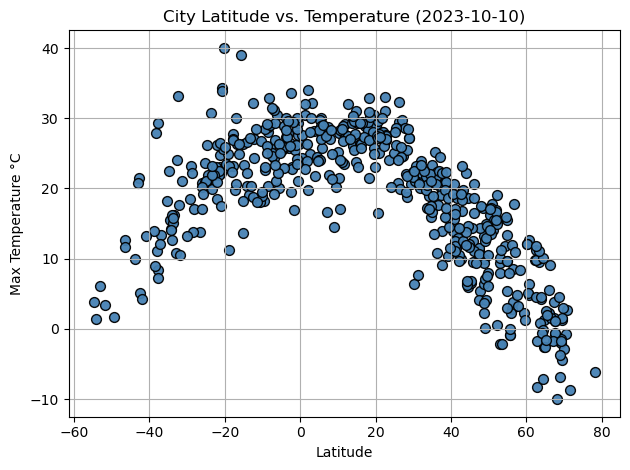

In [33]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],s= 50, marker="o", facecolors="steelblue", edgecolors="black",
             alpha=0.95)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")

# Convert linux format date to regular date format
date = city_data_df['Date'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d'))
cal_date = date[0]

# Print title of the scatter plot graph
plt.title(f"City Latitude vs. Temperature ({cal_date})")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Weather_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

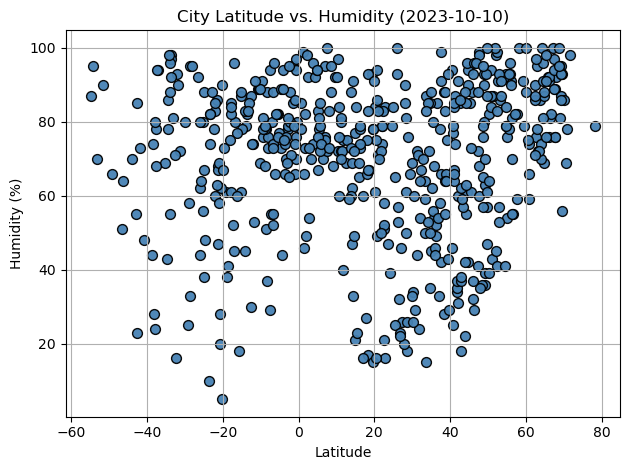

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],s= 50, marker="o", facecolors="steelblue", edgecolors="black",
             alpha=0.95)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Convert linux format date to regular date format
date = city_data_df['Date'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d'))
cal_date = date[0]

# Print title of the scatter plot graph
plt.title(f"City Latitude vs. Humidity ({cal_date})")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Weather_Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

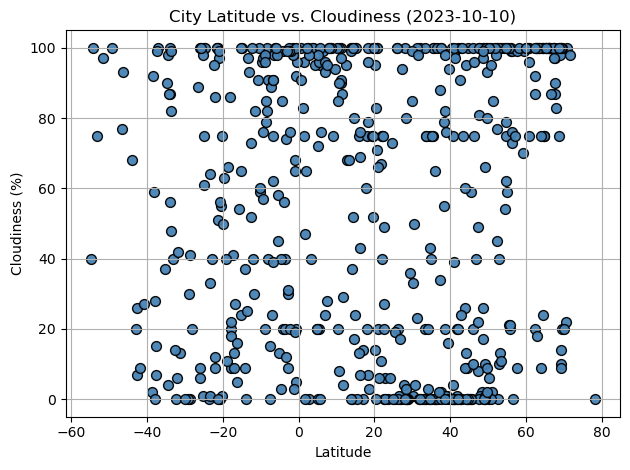

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], s= 50, marker="o", facecolors="steelblue", edgecolors="black",
             alpha=0.95)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Convert linux format date to regular date format
date = city_data_df['Date'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d'))
cal_date = date[0]

# Print title of the scatter plot graph
plt.title(f"City Latitude vs. Cloudiness ({cal_date})")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Weather_Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

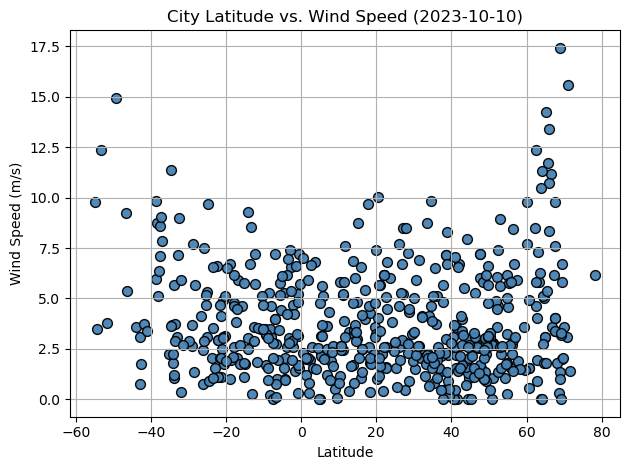

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], s= 50, marker="o", facecolors="steelblue", edgecolors="black",
             alpha=0.95)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Convert linux format date to regular date format
date = city_data_df['Date'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d'))
cal_date = date[0]

# Print title of the scatter plot graph
plt.title(f"City Latitude vs. Wind Speed ({cal_date})")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Weather_Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression(x,y, eq_print_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eq_print_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aginskoye,51.1000,114.5300,14.06,43,2,2.78,RU,1696996583
1,cedar city,37.6775,-113.0619,13.92,42,2,0.45,US,1696996930
2,redwood falls,44.5394,-95.1169,5.97,61,0,0.00,US,1696997008
3,hammerfest,70.6634,23.6821,-0.75,69,22,3.09,NO,1696996564
4,mahibadhoo,3.7833,72.9667,28.15,74,100,6.79,MV,1696997119


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
9,new norfolk,-42.7826,147.0587,21.51,23,26,0.75,AU,1696996547
11,waitangi,-43.9535,-176.5597,9.90,70,68,3.58,NZ,1696996521
16,ushuaia,-54.8000,-68.3000,3.81,87,40,9.77,AR,1696997040
19,adamstown,-25.0660,-130.1015,20.82,67,100,5.32,PN,1696997122
22,puerto natales,-51.7236,-72.4875,3.34,90,97,3.77,CL,1696997123


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.871196058885307


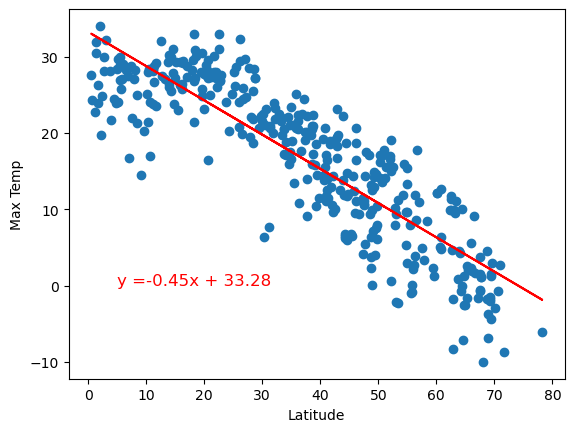

In [37]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (5,0))

# Save the figure
plt.savefig("../output_data/Weather_Fig5.png")

The r-value is: 0.6794742946693193


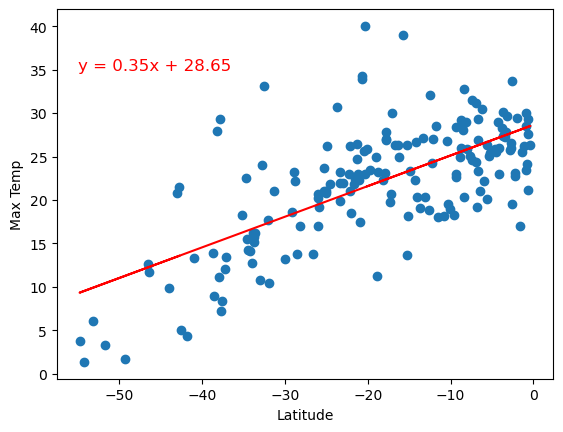

In [38]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-55,35))

# Save the figure
plt.savefig("../output_data/Weather_Fig6.png")

**Discussion about the linear relationship:** 

* There is a correlation seen in both the scatter plots. Strong negative correlation with the r-value of -0.871196058885307 
  for Northern Hemisphere while moderate positive correlation with the r-value of 0.6794742946693193 for Southern Hemisphere.

* From this we can conclude that there is a rise in max temperature as we approach towards equator (latitude = 0).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18806362523802853


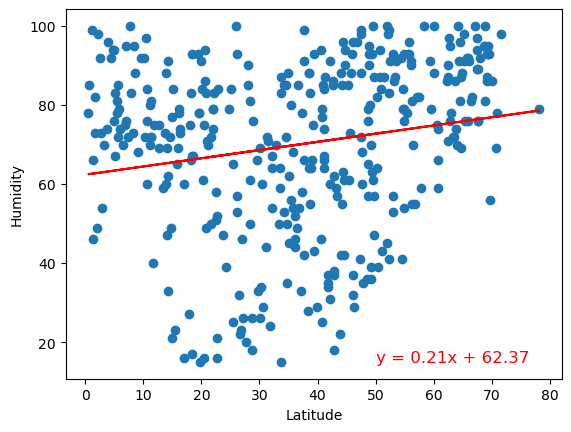

In [39]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50,15))

# Save the figure
plt.savefig("../output_data/Weather_Fig7.png")

The r-value is: 0.13085019001616957


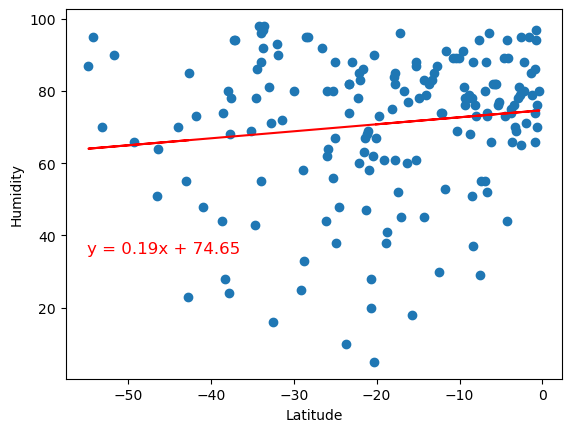

In [40]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-55,35))

# Save the figure
plt.savefig("../output_data/Weather_Fig8.png")

**Discussion about the linear relationship:** 
* With r-value of just 0.18806362523802853 for Northern Hemisphere and 0.13085019001616957 for Southern Hemisphere, there is no  correlation between Latitude and Humidity for both the hemispheres. 
  
* There appears to be too many outliers in the Humidity data for the cities across both the hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08222191718953474


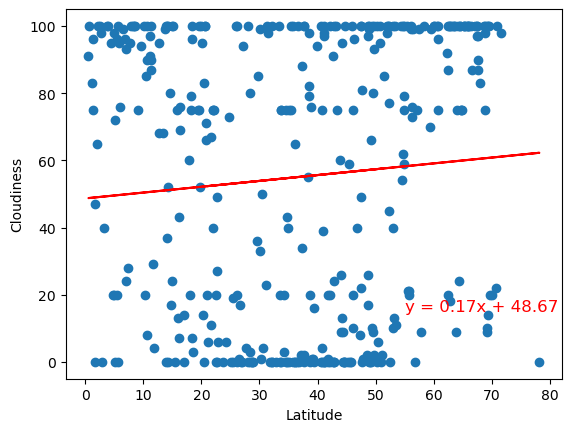

In [41]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (55,15))

# Save the figure
plt.savefig("../output_data/Weather_Fig9.png")

The r-value is: 0.08861519850155469


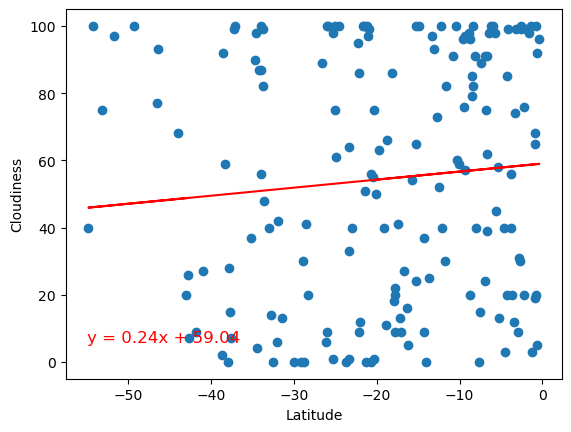

In [42]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-55,6))

# Save the figure
plt.savefig("../output_data/Weather_Fig10.png")

**Discussion about the linear relationship:** 

* With r-value of 0.08222191718953474 for Northern Hemisphere there is no correlation between latitude and 
  cloudiness.  
  
* With r-value of 0.08861519850155469 for Southern Hemisphere there is no correlation between latitude and 
  cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17746053539915158


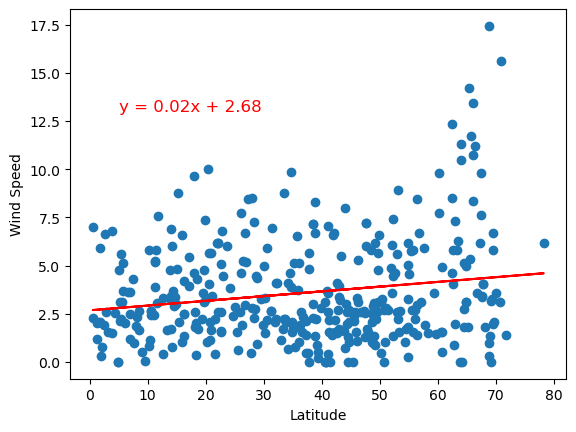

In [43]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (5,13))

# Save the figure
plt.savefig("../output_data/Weather_Fig11.png")

The r-value is: -0.2911270670127798


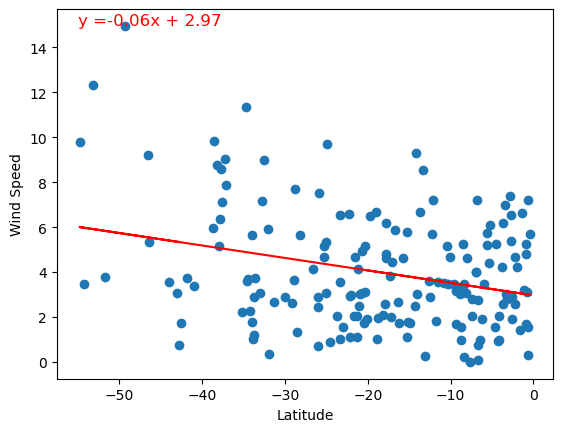

In [44]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-55,15))

# Save the figure
plt.savefig("../output_data/Weather_Fig12.png")

**Discussion about the linear relationship:** 

* With r-value of 0.17746053539915158 for Northern Hemisphere there is a very weak positive correlation between latitude and 
  wind speed.  
  
* With r-value of -0.2911270670127798 for Southern Hemisphere there is fairly weak negative linear correlation between 
  latitude and wind speed.